#YULU HYPOTHESIS TESTING

## About Yulu

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient.

## Problem Statment

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

The company wants to know:

1. Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
2. How well those variables describe the electric cycle demands

# Importing All Required Libraries

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

# Loading The Dataset

In [ ]:
yulu=pd.read_csv('/yulu_data.csv')

## Basic Data Analysis

In [ ]:
yulu.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
yulu.shape

(10886, 12)

Observations:

There are 10886 rows and 12 columns

In [ ]:
yulu.isna().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


Observations:

There are no null values in the dataset

In [ ]:
yulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
yulu.duplicated().any()

np.False_

Observations:

There are no duplicate entries in the dataset

In [ ]:
yulu.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


Observations from the descriptive statistics:

*   The `count` variable, which represents the total rentals, has a wide range (1 to 977) and a relatively high standard deviation (181.14), indicating variability in rental demand.
*   The mean number of registered users (155.55) is significantly higher than the mean number of casual users (36.02).
*   The `temp` and `atemp` variables have similar means and distributions, which is expected due to their high correlation.
*   The `humidity` ranges from 0 to 100, with a mean of around 61.89.
*   The `windspeed` has a wide range (0 to 56.99), but the majority of values are concentrated towards the lower end, as indicated by the mean (12.80) and median (12.99).

## Creating New Columns

In [ ]:
yulu['day'] = pd.to_datetime(yulu['datetime']).dt.day_name()
yulu['month']=pd.to_datetime(yulu['datetime']).dt.month_name()
yulu['year']=pd.to_datetime(yulu['datetime']).dt.year
yulu['hour'] =pd.to_datetime(yulu['datetime']).dt.hour


In [ ]:
yulu

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,year,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,Saturday,January,2011,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,Saturday,January,2011,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,Saturday,January,2011,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,Saturday,January,2011,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,Saturday,January,2011,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,Wednesday,December,2012,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,Wednesday,December,2012,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,Wednesday,December,2012,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,Wednesday,December,2012,22


In [ ]:
# Change seaon by name
yulu['season'] = yulu['season'].replace({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})

# change of holiday
yulu['holiday'] = yulu['holiday'].replace({0:'No',1:'Yes'})

# change of workingday
yulu['workingday'] = yulu['workingday'].replace({0:'No',1:'Yes'})

In [ ]:
yulu

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,year,hour
0,2011-01-01 00:00:00,Spring,No,No,1,9.84,14.395,81,0.0000,3,13,16,Saturday,January,2011,0
1,2011-01-01 01:00:00,Spring,No,No,1,9.02,13.635,80,0.0000,8,32,40,Saturday,January,2011,1
2,2011-01-01 02:00:00,Spring,No,No,1,9.02,13.635,80,0.0000,5,27,32,Saturday,January,2011,2
3,2011-01-01 03:00:00,Spring,No,No,1,9.84,14.395,75,0.0000,3,10,13,Saturday,January,2011,3
4,2011-01-01 04:00:00,Spring,No,No,1,9.84,14.395,75,0.0000,0,1,1,Saturday,January,2011,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,No,Yes,1,15.58,19.695,50,26.0027,7,329,336,Wednesday,December,2012,19
10882,2012-12-19 20:00:00,Winter,No,Yes,1,14.76,17.425,57,15.0013,10,231,241,Wednesday,December,2012,20
10883,2012-12-19 21:00:00,Winter,No,Yes,1,13.94,15.910,61,15.0013,4,164,168,Wednesday,December,2012,21
10884,2012-12-19 22:00:00,Winter,No,Yes,1,13.94,17.425,61,6.0032,12,117,129,Wednesday,December,2012,22


## Changing the categorical columns into category

In [ ]:
cat_col=['season','holiday','workingday','weather']

for i in cat_col:
  yulu[i]=yulu[i].astype('category')

In [ ]:
yulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   datetime    10886 non-null  object  
 1   season      10886 non-null  category
 2   holiday     10886 non-null  category
 3   workingday  10886 non-null  category
 4   weather     10886 non-null  category
 5   temp        10886 non-null  float64 
 6   atemp       10886 non-null  float64 
 7   humidity    10886 non-null  int64   
 8   windspeed   10886 non-null  float64 
 9   casual      10886 non-null  int64   
 10  registered  10886 non-null  int64   
 11  count       10886 non-null  int64   
 12  day         10886 non-null  object  
 13  month       10886 non-null  object  
 14  year        10886 non-null  int32   
 15  hour        10886 non-null  int32   
dtypes: category(4), float64(3), int32(2), int64(4), object(3)
memory usage: 978.8+ KB


In [ ]:
yulu.describe(include = 'category').transpose()

,count,unique,top,freq
season,10886,4,Winter,2734
holiday,10886,2,No,10575
workingday,10886,2,Yes,7412
weather,10886,4,1,7192


## Univariate Analysis

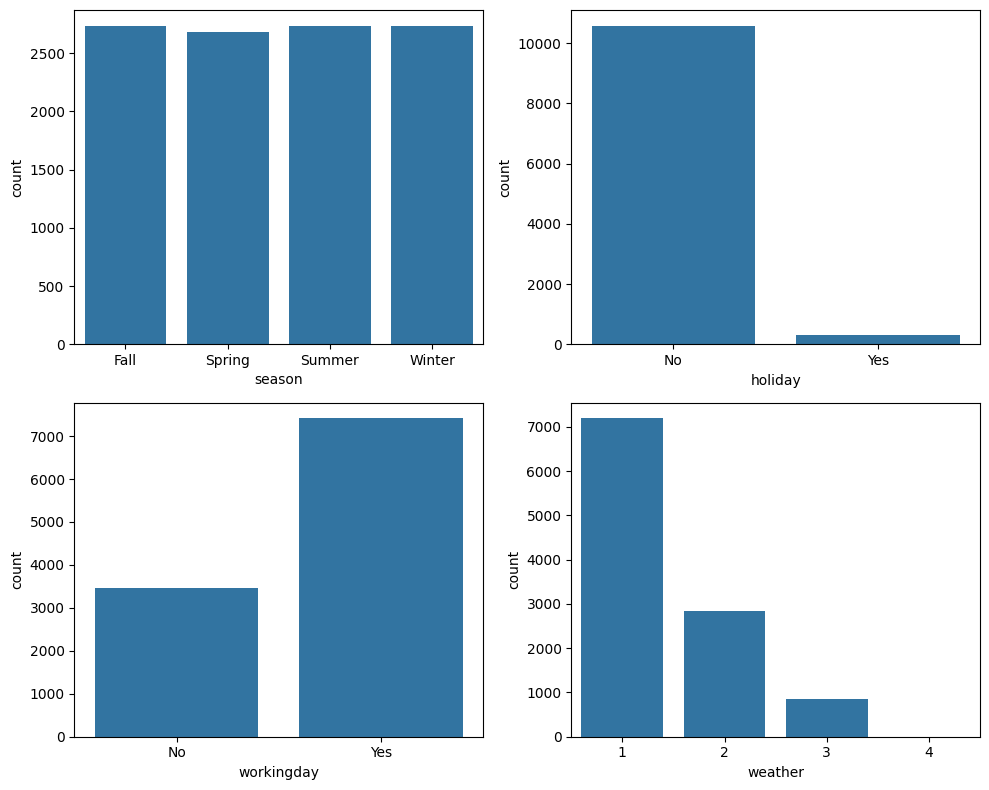

In [ ]:
plt.figure(figsize=(10,8))
for i,col in enumerate(cat_col,1):
  plt.subplot(2,2,i)
  sns.countplot(data=yulu,x=col)

plt.tight_layout()
plt.show()


## Average hourly distribution of vehicles across different monthss

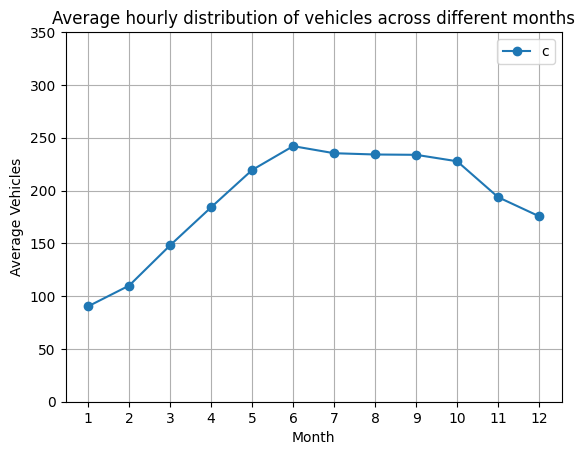

In [ ]:
yulu.groupby(by = yulu['datetime'].dt.month)['count'].mean().plot(kind = 'line', marker = 'o')
plt.title('Average hourly distribution of vehicles across different months')
plt.xlabel('Month')
plt.ylabel('Average Vehicles')
plt.ylim(0,)
plt.xticks(np.arange(1, 13))
plt.legend('count')
plt.yticks(np.arange(0, 400, 50))
plt.grid()
plt.show()

Observations:

The average hourly distribution of vehicles shows a clear seasonal pattern, with higher rental counts during certain months(between June to October with highest in June)

## Average count of rental bikes hourly basis daily

[]

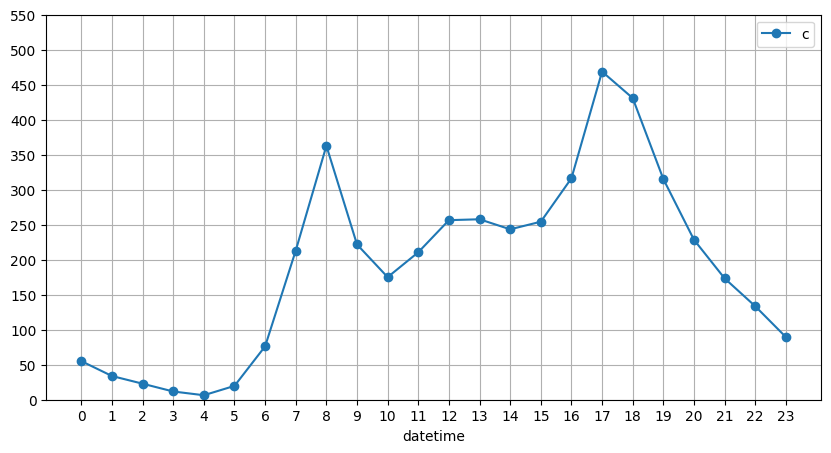

In [ ]:
plt.figure(figsize=(10,5))
yulu.groupby(by = yulu['datetime'].dt.hour)['count'].mean().plot(kind = 'line', marker = 'o')

plt.ylim(0)
plt.xticks(np.arange(0, 24))
plt.legend('count')
plt.yticks(np.arange(0, 600, 50))
plt.grid()
plt.plot()

Observations:

 Rental activity shows distinct peaks during certain hours of the day, likely corresponding to commute times. In the morning, there is a peak between 7-9 AM, implying people might be going to work, school, or other activities. In the evening, it is higher around 4-7 PM, implying people might be returning from work.

##Outlier Detection

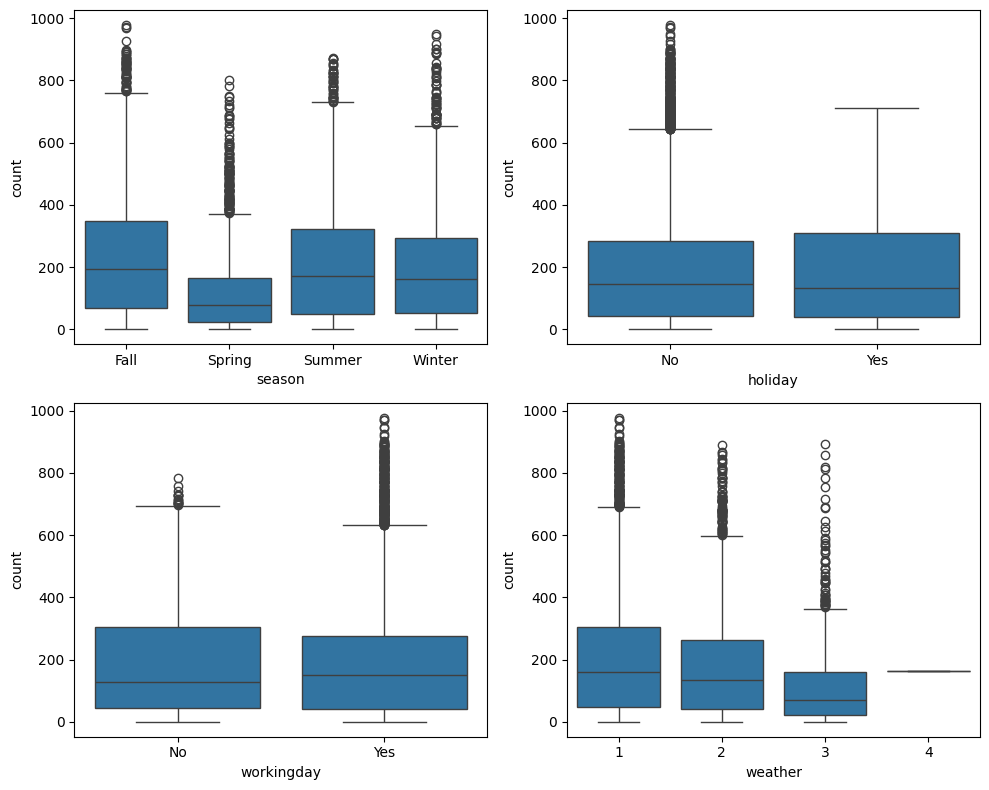

In [ ]:
plt.figure(figsize=(10,8))
for i,col in enumerate(cat_col,1):
  plt.subplot(2,2,i)
  sns.boxplot(data=yulu,x=col,y='count')

plt.tight_layout()
plt.show()


Observations


*   **Outliers:** The box plots indicate the presence of outliers in the `count` variable for different categorical features (`season`, `holiday`, `workingday`, `weather`).


In [ ]:
correlation_matrix = yulu[["atemp", "temp", "humidity", "windspeed", "casual", "registered", "count"]].corr()
correlation_yulu = pd.DataFrame(correlation_matrix)
correlation_yulu

,atemp,temp,humidity,windspeed,casual,registered,count
atemp,1.000000,0.984948,-0.043536,-0.057473,0.462067,0.314635,0.389784
temp,0.984948,1.000000,-0.064949,-0.017852,0.467097,0.318571,0.394454
humidity,-0.043536,-0.064949,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.057473,-0.017852,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.462067,0.467097,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.314635,0.318571,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.389784,0.394454,-0.317371,0.101369,0.690414,0.970948,1.000000


## Bivariate Analysis

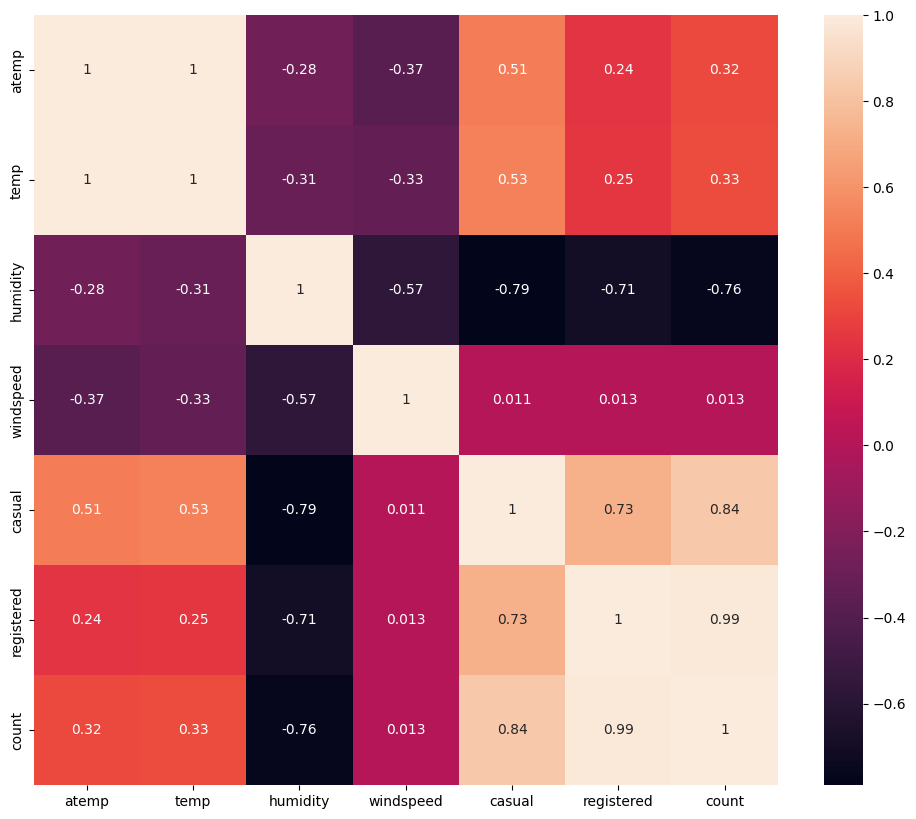

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_yulu.corr(), annot=True)
plt.show()

*   **Correlations:** The correlation matrix and pair plots show some notable relationships between variables:
    *   `temp` and `atemp` are highly correlated.
    *   `casual` and `registered` users both contribute to the total `count`.
    *   `humidity` seems to have a negative correlation with `count`, `casual`, and `registered` users.
    *   `windspeed` has a weak positive correlation with `count`.

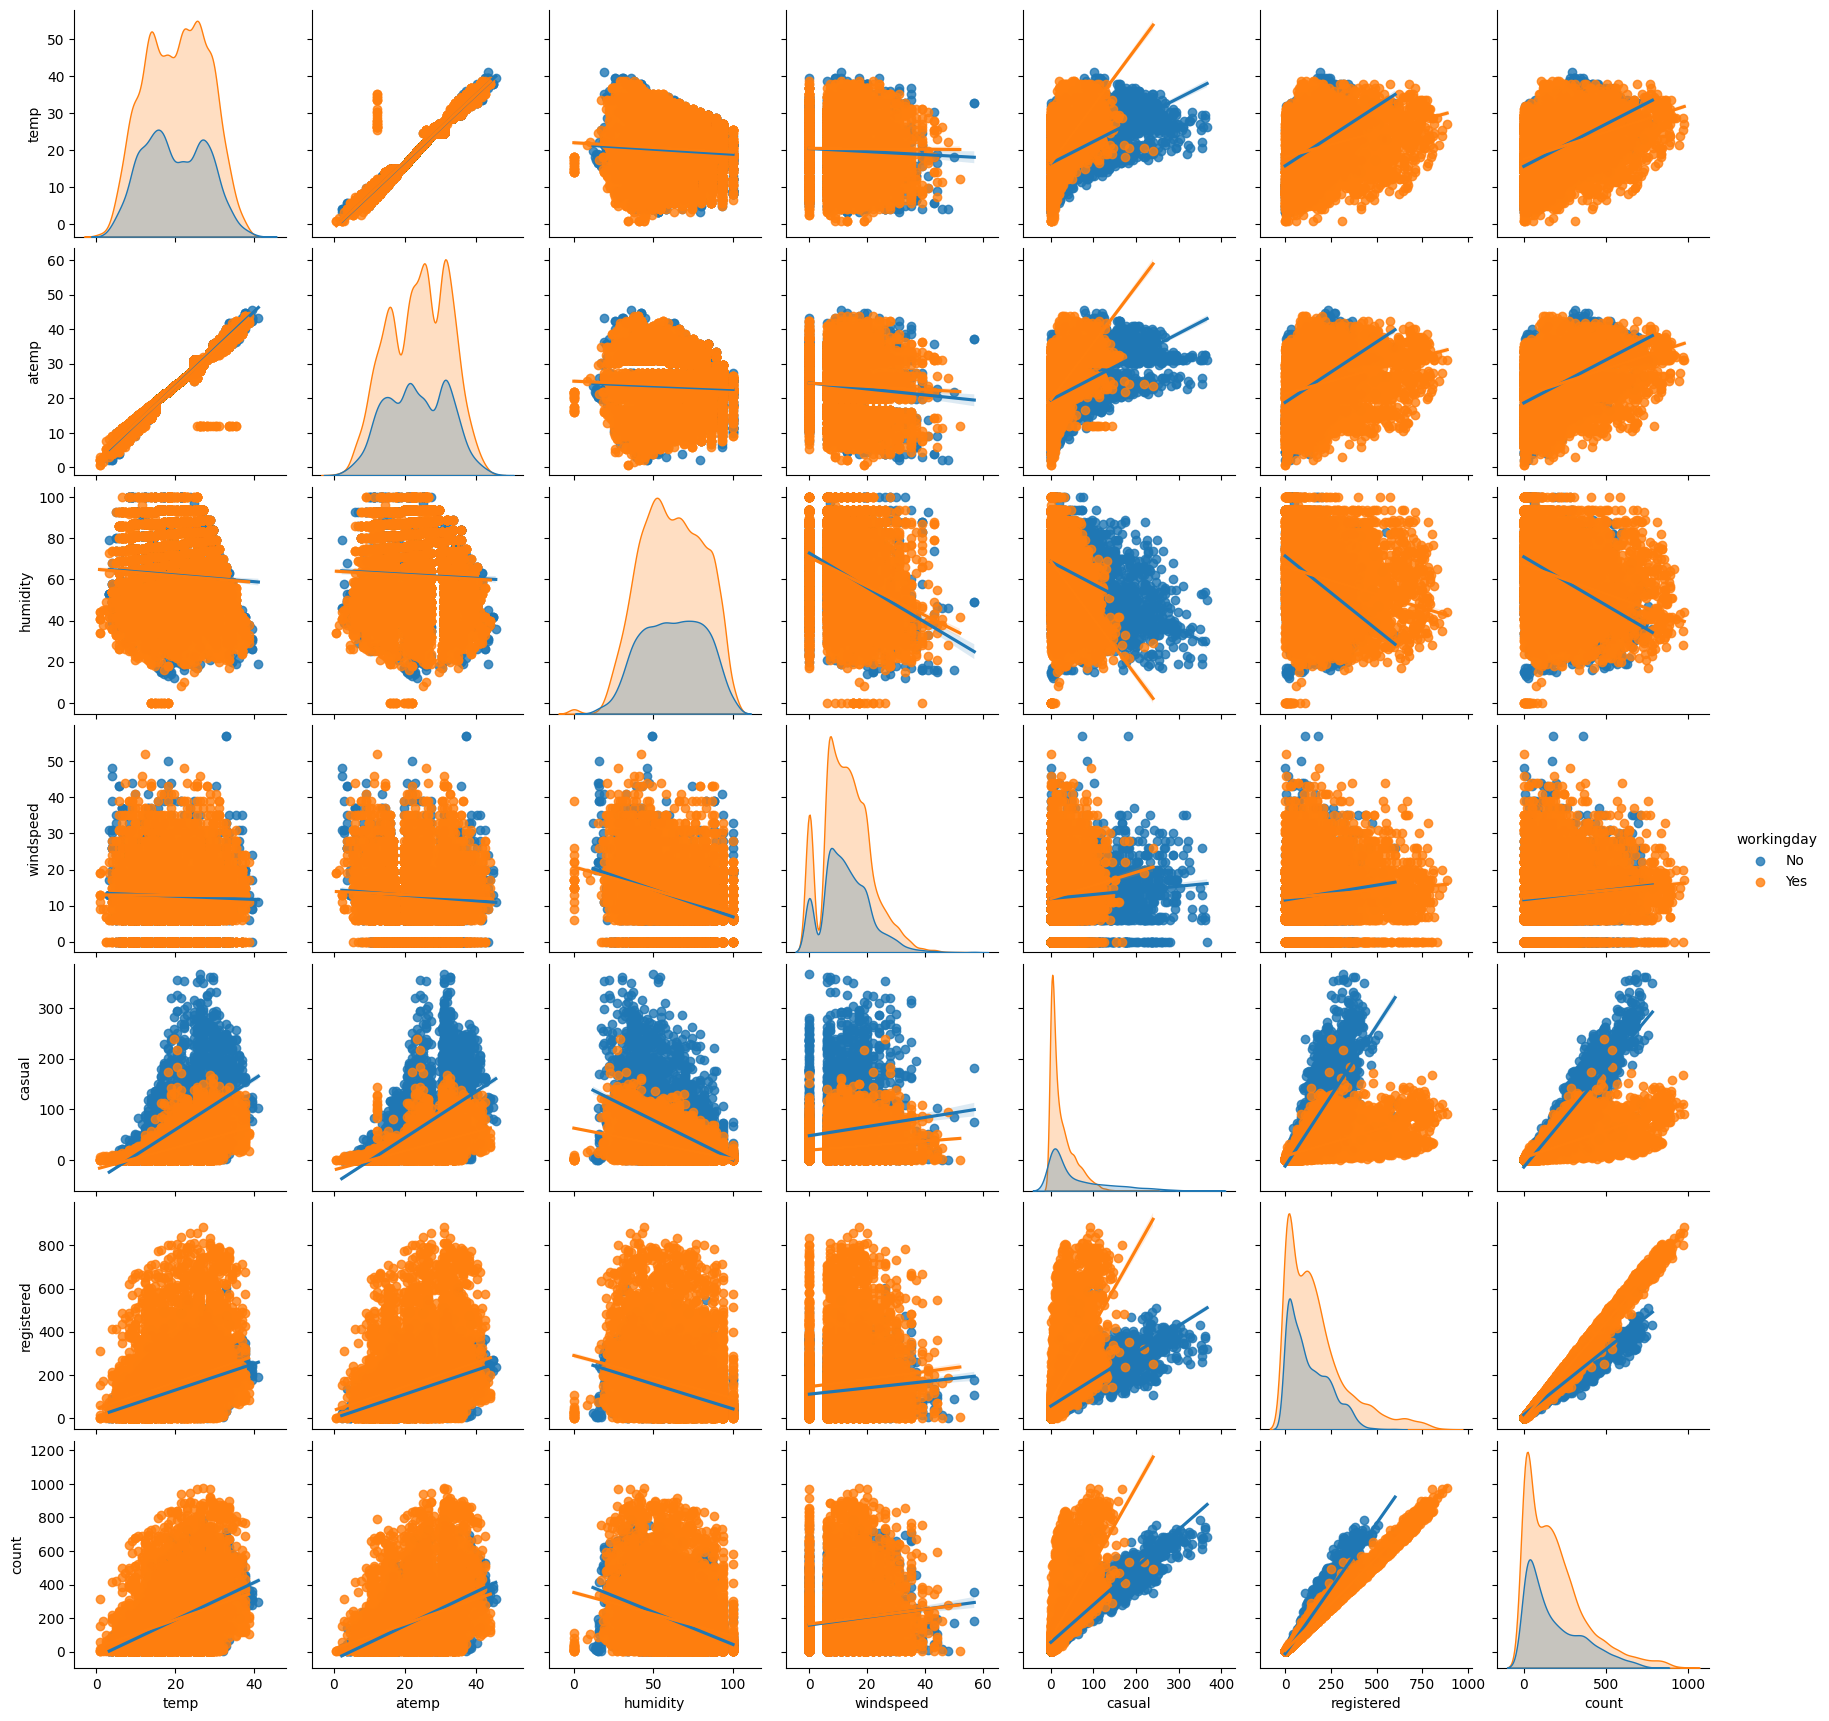

In [ ]:
sns.pairplot(data=yulu[['temp','atemp','humidity','windspeed','casual','registered','count', 'workingday']],kind='reg',hue='workingday')

Observations from the pair plot:

*   **temp and atemp:** The pair plot confirms the strong linear relationship between `temp` and `atemp`.
*   **count, casual, and registered:** The pair plots show that both `casual` and `registered` users have a positive linear relationship with the total `count`. This is expected as `count` is the sum of `casual` and `registered`.
*   **humidity and count/casual/registered:** The pair plots suggest a negative relationship between `humidity` and `count`, `casual`, and `registered`. As humidity increases, the rental counts tend to decrease.
*   **windspeed and count/casual/registered:** The pair plots show a weak positive relationship between `windspeed` and `count`, `casual`, and `registered`.
*   **Workingday and other variables:** The `workingday` variable appears to influence the distribution of `casual` and `registered` users, with more `registered` users on working days and more `casual` users on non-working days.

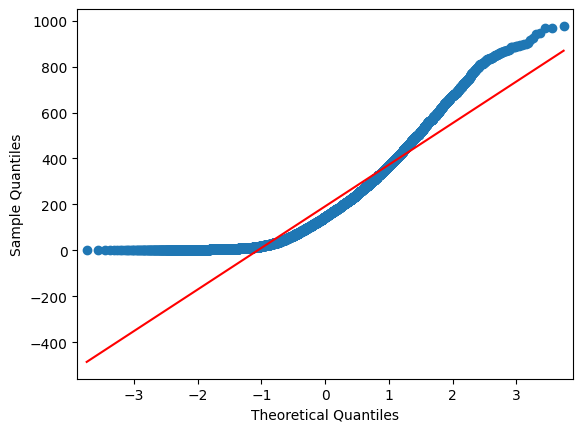

In [ ]:
yulu['datetime'] = pd.to_datetime(yulu['datetime'])
time_span = yulu['datetime'].max() - yulu['datetime'].min()
time_span

Timedelta('718 days 23:00:00')

# Hypothesis Testing

Lets check the normality of data first

In [ ]:
## Using Shapiro
import random
random.seed(43)
stats.shapiro(yulu.sample(1000)['count'])

ShapiroResult(statistic=np.float64(0.8929482409690479), pvalue=np.float64(8.894107122617922e-26))

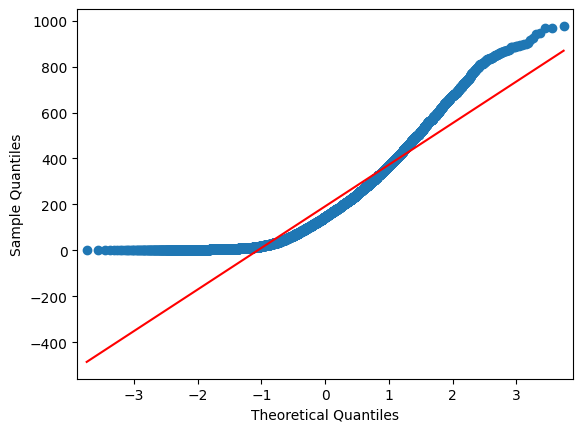

In [ ]:
## Using QQ-Plot
qqplot(yulu['count'], line = 's')
plt.show()


Observations:

* As seen in Shapiro Test p-value is less than 0.05 we can say that data is not normally distributed.
* Same can be confirmed as seen in QQ Plot

## Check whether if working day has an effect on electric cylcles rented

Since the distribution is not normal as seen above lets check for variance between two groups so lets perform Levene Test

Hypothesis For Levene Test

* H0- Variances are equal

* H1- Variances are not equal

In [ ]:
working_day = yulu[yulu['workingday'] == 'Yes']['count']
holiday = yulu[yulu['workingday'] == 'No']['count']
stats.levene(working_day,holiday)


LeveneResult(statistic=np.float64(0.004972848886504472), pvalue=np.float64(0.9437823280916695))

* Since the p-value>0.05 the variances between two groups are equal.

* Although the data is not normally distributed but the variance is equal so we can go for 2 sample T - Test .

Hypothesis For T-Test:

* There is no significant difference between the two groups.

* There is a significant difference between the two groups.

In [ ]:
stats.ttest_ind(working_day,holiday,alternative='two-sided')

TtestResult(statistic=np.float64(1.2096277376026694), pvalue=np.float64(0.22644804226361348), df=np.float64(10884.0))

Observations:

*   **Working Day vs. Holiday:** The t-test suggests there is no significant difference in the mean number of rentals between working days and holidays as we can see that pvalue is greater than significance level

## Demand of bicylcles are same or different on different seasons

The data is not normally distributed so lets check for the variance of according to seasons

In [ ]:
spring = yulu[yulu['season'] == 'Spring']['count']
summer = yulu[yulu['season'] == 'Summer']['count']
fall = yulu[yulu['season'] == 'Fall']['count']
winter = yulu[yulu['season'] == 'Winter']['count']

In [ ]:
stats.levene(spring,summer,fall,winter)

LeveneResult(statistic=np.float64(187.7706624026276), pvalue=np.float64(1.0147116860043298e-118))

* Since the p-values are less than 0.05 for all the seasons we can say variances are not equal

* Lets perform both Anova testing and Kruskal Walis. In case of discrepancies Kruskal Walis test will be considered

In [ ]:
# Anova Testing
stats.f_oneway(spring,summer,fall,winter)

F_onewayResult(statistic=np.float64(236.94671081032098), pvalue=np.float64(6.164843386499654e-149))

In [ ]:
# Kruskal Walis Testing
stats.kruskal(spring,summer,fall,winter)

KruskalResult(statistic=np.float64(699.6668548181988), pvalue=np.float64(2.479008372608633e-151))

Observations:

* Since the p-value is less than 0.05 in both Anova And Kruskal Walis Test we can reject the null Hypothesis

* It can be concluded that there is a significant difference in the distribution of rental counts across different seasons.

## Demand of bicylcles are same or different on different weathers

The data is not normally distributed so lets check for the variance of according to waethers

In [ ]:
weather1 = yulu[yulu['weather'] == 1]['count']
weather2 = yulu[yulu['weather'] == 2]['count']
weather3 = yulu[yulu['weather'] == 3]['count']
weather4 = yulu[yulu['weather'] == 4]['count']


In [ ]:
stats.levene(weather1,weather2,weather3,weather4)

LeveneResult(statistic=np.float64(54.85106195954556), pvalue=np.float64(3.504937946833238e-35))

* Since the p-values are less than 0.05 we can say that variances are not equal for different weathers.

* Lets perform both Anova testing and Kruskal Walis. In case of discrepancies Kruskal Walis test will be considered.

In [ ]:
# Anova Testing
stats.f_oneway(weather1,weather2,weather3,weather4)

F_onewayResult(statistic=np.float64(65.53024112793265), pvalue=np.float64(5.482069475935669e-42))

In [ ]:
# Kruskal Walis
stats.kruskal(weather1,weather2,weather3,weather4)

KruskalResult(statistic=np.float64(205.00216514479087), pvalue=np.float64(3.501611300708679e-44))

Observations:

* Since the p-value is less than 0.05 in both Anova And Kruskal Walis Test we can reject the null Hypothesis

* It can be concluded that there is a significant difference in the distribution of rental counts across different weathers.

In [ ]:
pd.crosstab(index=yulu['weather'],columns=yulu['season'])

season,Fall,Spring,Summer,Winter
weather,,,,
1,1930,1759,1801,1702
2,604,715,708,807
3,199,211,224,225
4,0,1,0,0


## Relation between Weather And Season

In [ ]:
stats.chi2_contingency(pd.crosstab(index=yulu['weather'],columns=yulu['season']))

Chi2ContingencyResult(statistic=np.float64(49.15865559689363), pvalue=np.float64(1.5499250736864862e-07), dof=9, expected_freq=array([[1.80559765e+03, 1.77454639e+03, 1.80559765e+03, 1.80625831e+03],
       [7.11493845e+02, 6.99258130e+02, 7.11493845e+02, 7.11754180e+02],
       [2.15657450e+02, 2.11948742e+02, 2.15657450e+02, 2.15736359e+02],
       [2.51056403e-01, 2.46738931e-01, 2.51056403e-01, 2.51148264e-01]]))

Observations:

*   **Weather and Season Relationship:** The Chi-squared test shows a significant association between weather and season.

# Recommendations


Based on the analysis of the Yulu bike rental data, the following recommendations are made:

1.  **Seasonality:** The demand for electric cycles varies significantly across different seasons. Marketing campaigns and cycle availability should be adjusted based on the season, with a focus on increasing supply during peak seasons (Summer and Fall).

2.  **Weather Conditions:** Weather significantly impacts rental demand. Yulu should consider implementing dynamic pricing or special offers during less favorable weather conditions (e.g., light snow, light rain) to encourage rentals. For very bad weather conditions, operations might need to be limited or suspended for safety.

3.  **Working Day vs. Holiday:** While the mean number of rentals doesn't show a significant difference between working days and holidays, the user distribution differs (more registered users on working days, more casual users on holidays). Tailored marketing and promotions for each user segment (casual vs. registered) on different days of the week could be beneficial.

4.  **Hourly Peaks:** The distinct peaks in rental activity during morning and evening commute hours suggest an opportunity to optimize cycle distribution and availability at Yulu zones near offices, metro stations, and residential areas during these times.

5.  **Outlier Management:** While not explicitly analyzed for impact, the presence of outliers in the 'count' variable across different categories warrants further investigation. Understanding the cause of these outliers (e.g., special events, system errors) could lead to operational improvements or data cleaning strategies.

6.  **Humidity:** The negative correlation between humidity and rental count suggests that Yulu might want to consider strategies to mitigate the impact of high humidity on user comfort, such as providing wipes or suggesting routes with less exposure.

7.  **Marketing Focus:** Given that registered users contribute significantly more to the total count than casual users, Yulu should continue to focus on acquiring and retaining registered users through loyalty programs, subscription plans, or other incentives. However, targeted campaigns for casual users during holidays and weekends could also boost overall rentals.

By implementing these recommendations, Yulu can better understand and predict the demand for their electric cycles, optimize their operations, and potentially improve revenue.
